## Support Vector Machines - Supplementary Materials

This document provides supplementary explanations for specific sections of *SVM_pre_1.ipynb*, enhancing the representation of its theoretical foundations  and technical implementation.


In [1]:
import numpy as np
import seaborn as sns
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn import svm
from PIL import Image

### Support Vectors and Soft Margin

First, conduct errata clarification regarding support vectors and soft margins.

#### The definition of Support Vectors

First, it should be noted that support vectors are a specific concept in support vector machines. If other methods are used to find the separating hyperplane, support vectors will not exist.  

We can refer to the definition provided in *C. Cortes, V. Vapnik. 'Support-Vector Networks' (Machine Learning, 1995)*. Note that V. Vapnik is one of the founders of SVMs, making the definition in this paper authoritative:  

*'It was observed that to construct such optimal hyperplanes one only has to take into account a small amount of the training data, the so-called support vectors, which determine this margin.'*  

Furthermore, this statement in the paper indicates that support vectors are the training samples that determine the optimal hyperplane. In the mathematical formulation of the optimization problem, support vectors correspond to the points where the inequality constraints hold with equality.

#### Soft Margin

For the figure illustrating the soft margin of a support vector classifier, we divide the plane into three regions: the correct side of the margin, the wrong side of the margin, and the wrong side of the hyperplane. A question arises: in practical scenarios, can data points fall outside the soft margin on the wrong side of the hyperplane?  

In fact, when discussing the application of SVMs to nonlinearly separable datasets, we presented results using a linear kernel for classification. From the introduction to kernels, it is known that an SVM with a linear kernel is equivalent to a support vector classifier. In other words, the fact that a support vector classifier can handle nonlinearly separable datasets implies that it permits data points to fall outside the soft margin on the wrong side of the hyperplane.  

To strengthen this argument, we can refer to the following example figure from the *The Elements of Statistical Learning: Data Mining, Inference, and Prediction (Second Edition)*, in the section on support vector classifiers:

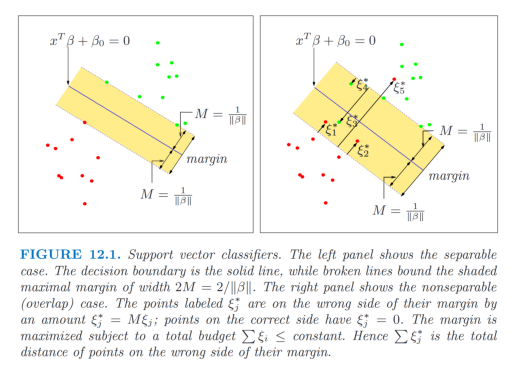

In [2]:
file_path = '.\\picture\\soft margin example.png'

img = Image.open(file_path)
plt.imshow(img)
plt.axis('off')
fig = plt.gcf()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

It can be observed that sample points are permitted to fall outside the soft margin on the wrong side of the hyperplane.

### Visualization of SVM decision boundaries - A case study using RBF

In *SVM_pre_1.ipynb*, we briefly introduced the kernel trick of support vector machines and three common kernels without detailed analysis of their computational implementation.

During the first presentation, a student questioned why the decision boundary under the RBF kernel is nonlinear, to which I initially responded by mentioning projection. After repeated reflection and literature review, I concluded this explanation was incomplete.

Therefore, in this document, we will perform numerical computations using simple examples to demonstrate how support vector machines with RBF kernels operate, thereby explaining the nonlinear nature of their decision boundaries.

#### The standard formulation of Support Vector Machines

From previous discussions, we know the decision function of the support vector classifier takes the form:
$$
f(\boldsymbol{x})=\beta_0+\sum_{i=1}^{n}\alpha_i y_i\langle \boldsymbol{x},\boldsymbol{x_i}\rangle
$$

Regarding how to obtain the parameters of the decision boundary in this formulation, we only mentioned that they can be solved through the dual form of the support vector classifier without elaborating on the details.

But why use the dual form rather than the primal form for solving?

Let us revisit the primal form of the support vector classifier:

$$
\begin{aligned}
&\max_{\beta_0,\beta_1,\ldots,\beta_p,\epsilon_1,\ldots,\epsilon_n} M \\
&\text{subject to} \quad \sum_{j=1}^p \beta_j^2 = 1, \\
&\qquad\qquad\quad \begin{aligned}
&y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) \ge M(1 - \epsilon_i), \quad \forall i = 1,\ldots,n, \\
&\epsilon_i \ge 0, \quad \sum_{i=1}^n \epsilon_i \le C.
\end{aligned}
\end{aligned}
$$

Several issues arise when solving the SVM using the primal form:

1. The primal form cannot directly incorporate kernel functions, as its formulation relies on explicit $\boldsymbol{\beta}$ parameters.
2. The constraint $\sum_{j=1}^p{\beta_j^2 =1}$ defines a p-dimensional unit sphere, which is a non-convex set, making the feasible region non-convex and the optimization problem difficult to solve.
3. The constraints in the primal form are complex, and computational efficiency decreases significantly when the feature dimension $p$ is high.

In practice, the dual form of the support vector classifier effectively circumvents these issues. Therefore, transforming the optimization problem into its dual form is essential. We will now systematically derive the dual formulation of this optimization problem.

##### Derivation of the Dual Problem for Support Vector Classifiers

The primal formulation of the support vector classifier:

$$
\begin{aligned}
&\max_{\beta_0,\beta_1,\ldots,\beta_p,\epsilon_1,\ldots,\epsilon_n} M \\
&\text{subject to} \quad \sum_{j=1}^p \beta_j^2 = 1, \\
&\qquad\qquad\quad \begin{aligned}
&y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) \ge M(1 - \epsilon_i), \quad \forall i = 1,\ldots,n, \\
&\epsilon_i \ge 0, \quad \sum_{i=1}^n \epsilon_i \le C.
\end{aligned}
\end{aligned}
$$

To transform the original problem into a standard convex optimization problem, we first reparameterize $\beta_i'=\frac{\beta_i}{M},\forall i = 0,1,\ldots,p$ to handle the equality constraint.

Thus $$\sum_{j=1}^p \beta_j^2=\sum_{j=1}^p (M\beta_j')^2=M^2\sum_{j=1}^p (\beta_j')^2 =M^2||\boldsymbol{\beta'}||^2= 1,\quad \Rightarrow\quad M=\frac{1}{||\boldsymbol{\beta'}||}$$

Therefore, the original objective function $$\max_{\beta_0,\beta_1,\ldots,\beta_p,\epsilon_1,\ldots,\epsilon_n} M $$ 

is equivalent to $$\min_{\beta_0',\beta_1',\ldots,\beta_p',\epsilon_1,\ldots,\epsilon_n} ||\boldsymbol{\beta'}|| $$

For easier differentiation, we modify it to $$\min_{\beta_0',\beta_1',\ldots,\beta_p',\epsilon_1,\ldots,\epsilon_n} \frac{1}{2} ||\boldsymbol{\beta'}||^2 $$

Similarly, $$y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) \ge M(1 - \epsilon_i), \quad \forall i = 1,\ldots,n$$

after $\beta$ update becomes: $$y_i(\beta_0' + \beta_1' x_{i1} + \beta_2' x_{i2} + \cdots + \beta_p' x_{ip}) \ge 1 - \epsilon_i, \quad \forall i = 1,\ldots,n$$

After reorganizing the reparameterized optimization problem and replacing $\beta_i'$ with $\beta_i$, we obtain:

$$
\begin{aligned}
&\quad\min_{\beta_0,\boldsymbol{\beta},\epsilon_1,\ldots,\epsilon_n} \frac{1}{2} ||\boldsymbol{\beta}||^2 \\
&\text{subject to}\quad y_i(\beta_0 + \boldsymbol{x_i}^T\boldsymbol{\beta}) \ge 1 - \epsilon_i, \quad \forall i = 1,\ldots,n, \\
&\qquad\qquad\quad  \begin{aligned}
&\epsilon_i \ge 0, \quad \sum_{i=1}^n \epsilon_i \le C.
\end{aligned}
\end{aligned}
$$

According to *C. Cortes, V. Vapnik. "Support-Vector Networks" (Machine Learning, 1995)*, we can incorporate the inequality constraint $\sum_{i=1}^n\epsilon_i\le C$ into the objective function:

$$
\begin{aligned}
&\quad\min_{\beta_0,\boldsymbol{\beta},\epsilon_1,\ldots,\epsilon_n} \frac{1}{2} ||\boldsymbol{\beta}||^2 + C\sum_{i=1}^n\epsilon_i \\
&\text{subject to}\quad y_i(\beta_0 + \boldsymbol{x_i}^T\boldsymbol{\beta}) \ge 1 - \epsilon_i, \quad \forall i = 1,\ldots,n, \\
&\qquad\qquad\quad  \begin{aligned}
&\epsilon_i \ge 0
\end{aligned}
\end{aligned}
$$

Here $C$ remains a hyperparameter, where larger $C$ values make the model more sensitive to classification errors, resulting in smaller soft margins. This effect is opposite to the role of $C$ in the previous inequality constraint $\sum_{i=1}^n\epsilon_i\le C$.

According to the KKT conditions, we set the Lagrange multipliers for the two inequality constraints as $\alpha_i$ and $\mu_i$ respectively, and write the Lagrangian function:

$$L(\beta_0,\boldsymbol{\beta},\boldsymbol{\epsilon},\boldsymbol{\alpha},\boldsymbol{\mu})=\frac{1}{2} ||\boldsymbol{\beta}||^2+C\sum_{i=1}^n\epsilon_i-\sum_{i=1}^n\alpha_i[y_i(\beta_0+\boldsymbol{x_i^T}\boldsymbol{\beta})-(1-\epsilon_i)]-\sum_{i=1}^n\mu_i\epsilon_i$$
where $\boldsymbol{\beta}=(\beta_1,...,\beta_p)^T$, $\boldsymbol{\epsilon}=(\epsilon_1,...,\epsilon_n)^T$, $\boldsymbol{\alpha}=(\alpha_1,...,\alpha_n)^T$ and $\boldsymbol{\mu}=(\mu_1,...,\mu_n)^T$.

Taking partial derivatives with respect to $\beta_0$, $\boldsymbol{\beta}$, and $\epsilon_i$ and setting them to zero yields:

$$\frac{\partial L}{\partial \beta_0}=-\sum_{i = 1}^{n}\alpha_i y_i=0$$

$$\frac{\partial L}{\partial \boldsymbol{\beta}}=\boldsymbol{\beta}-\sum_{i = 1}^{n}\alpha_i y_i \boldsymbol{x_i}=0$$

$$\frac{\partial L}{\partial \epsilon_i}=C-\alpha_i-\mu_i=0$$

Simplifying gives:
$$\sum_{i = 1}^{n}\alpha_i y_i=0$$

$$\boldsymbol{\beta}=\sum_{i = 1}^{n}\alpha_i y_i \boldsymbol{x_i}$$

$$\mu_i=C-\alpha_i$$

From the KKT conditions, the Lagrange multipliers $\alpha_i$ and $\mu_i$ are non-negative, so from $\mu_i=C-\alpha_i$ we derive:
$$\mu_i=C-\alpha_i\ge0\quad\Rightarrow\quad0\le\alpha_i\le C$$

Substituting the obtained relationships for $\boldsymbol{\beta}$ and $\mu_i$ back into the Lagrangian $L$ yields:

$$
\begin{aligned}
& L(\beta_0,\boldsymbol{\epsilon},\boldsymbol{\alpha})=\frac{1}{2} ||\sum_{i = 1}^{n}\alpha_i y_i \boldsymbol{x_i}||^2+C\sum_{i=1}^n\epsilon_i-\sum_{i=1}^n\alpha_i[y_i(\beta_0+\boldsymbol{x_i^T}\sum_{j = 1}^{n}\alpha_j y_j \boldsymbol{x_j})-(1-\epsilon_i)]-\sum_{i=1}^n(C-\alpha_i)\epsilon_i\\
& \qquad\qquad\quad\begin{aligned}
& =\frac{1}{2} ||\sum_{i = 1}^{n}\alpha_i y_i \boldsymbol{x_i}||^2+C\sum_{i=1}^n\epsilon_i-\beta_0\sum_{i=1}^n\alpha_i y_i-||\sum_{i = 1}^{n}\alpha_i y_i \boldsymbol{x_i}||^2+\sum_{i=1}^n \alpha_i-\sum_{i=1}^n \alpha_i\epsilon_i-\sum_{i=1}^n C\epsilon_i+\sum_{i=1}^n \alpha_i\epsilon_i\\
& =\sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j y_i y_j \boldsymbol{x_i^T} \boldsymbol{x_j}
\end{aligned}
\end{aligned}
$$

The dual problem of the support vector classifier is finally formulated as:

$$
\begin{aligned}
&\qquad\max_{\alpha_1,\ldots,\alpha_n} \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j y_i y_j \boldsymbol{x_i^T} \boldsymbol{x_j} \\
&\text{subject to}\quad 0\le\alpha_i\le C,\quad\forall i = 0,1,\ldots,n\\
&\qquad\qquad\quad\begin{aligned}
&\sum_{i=1}^n\alpha_i y_i=0
\end{aligned}
\end{aligned}
$$

Here $C$ serves as the upper bound for $\alpha_i$ while maintaining consistency with previous definitions - larger $C$ values indicate greater sensitivity to classification errors and result in smaller soft margins.

Furthermore, only training samples $\boldsymbol{x_i}$ with $\alpha_i>0$ become support vectors. Larger $\alpha_i$ values indicate that the corresponding $\boldsymbol{x_i}$ has greater influence on the hyperplane and is more likely to be an outlier that may cause overfitting, which aligns with the effects observed when increasing $C$.

Compared with the primal form:
$$
\begin{aligned}
&\max_{\beta_0,\beta_1,\ldots,\beta_p,\epsilon_1,\ldots,\epsilon_n} M \\
&\text{subject to} \quad \sum_{j=1}^p \beta_j^2 = 1, \\
&\qquad\qquad\quad \begin{aligned}
&y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) \ge M(1 - \epsilon_i), \quad \forall i = 1,\ldots,n, \\
&\epsilon_i \ge 0, \quad \sum_{i=1}^n \epsilon_i \le C.
\end{aligned}
\end{aligned}
$$

The dual form solution is sparser and directly reveals which training samples are support vectors.

After uniformly scaling all coefficients $\beta$ of the decision plane by dividing by margin $M$, we can substitute the dual solution $\boldsymbol{\alpha}=(\alpha_1,...,\alpha_n)$ obtained from solving the dual problem into:
$$\boldsymbol{\beta}=\sum_{i = 1}^{n}\alpha_i y_i \boldsymbol{x_i}$$
to obtain the necessary parameters $\boldsymbol{\beta}=(\beta_1,...,\beta_p)$ for the decision plane. The intercept $\beta_0$ can be solved by plugging any support vector into $y_i(\beta_0 + \boldsymbol{x_i}^T\boldsymbol{\beta}) = 1$.

This yields the decision function:
$$
f(\boldsymbol{x})=\beta_0+\sum_{i=1}^{n}\alpha_i y_i\langle \boldsymbol{x},\boldsymbol{x_i}\rangle
$$

##### Derivation of the Standard SVM Formulation

First, let's revisit the core kernel trick of SVMs: When training samples are linearly inseparable, we can map them to a higher-dimensional feature space where they become linearly separable, such as transforming $\langle \boldsymbol{x_i},\boldsymbol{x_j}\rangle$ into $\langle \phi(\boldsymbol{x_i}),\phi(\boldsymbol{x_j})\rangle$. However, direct computation may be infeasible when the feature space dimensionality is too high. The kernel trick avoids explicit computation in high-dimensional space by defining $K(\boldsymbol{x_i},\boldsymbol{x_j})=\langle \phi(\boldsymbol{x_i}),\phi(\boldsymbol{x_j})\rangle$.

A necessary and sufficient condition for $K(\boldsymbol{x_i},\boldsymbol{x_j})$ to be a valid kernel function is given by Mercer's Theorem: For any set of input samples, the $n\times n$ matrix formed by $K(\boldsymbol{x_i},\boldsymbol{x_j})$ must be symmetric and positive semi-definite.

Building on previous discussion, the SVM replaces inner products with nonlinear kernels, modifying the decision function to:
$$
f(\boldsymbol{x})=\beta_0+\sum_{i=1}^{n}\alpha_i y_i K(\boldsymbol{x},x_i)
$$

To obtain the coefficients $\boldsymbol{\alpha}=(\alpha_1,...,\alpha_n)$, we solve the equivalent optimization problem:
$$
\begin{aligned}
&\qquad\max_{\alpha_1,\ldots,\alpha_n} \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j y_i y_j K(\boldsymbol{x_i},\boldsymbol{x_j}) \\
&\text{subject to}\quad 0\le\alpha_i\le C,\quad\forall i = 1,...,n\\
&\qquad\qquad\quad\begin{aligned}
&\sum_{i=1}^n\alpha_i y_i=0
\end{aligned}
\end{aligned}
$$

#### Numerical Computation Example

We will now perform numerical computations for a RBF kernel SVM using simplified data.

For computational simplicity, we select a minimal set of sample points:

Class $+1$: $(0.1,0.5)$, $(0.2,-0.3)$, $(-0.5,0.2)$, $(-0.3,0.4)$

Class $-1$: $(0.4,0.8)$, $(0.6,0.1)$, $(0.5,-0.9)$, $(-0.7,-0.3)$, $(-0.5,0.6)$, $(-0.6,0.4)$

The spatial distribution is illustrated below:

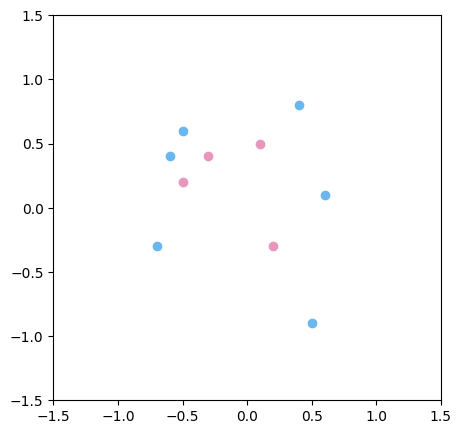

In [3]:
X_pos = np.array([[0.1, 0.5], [0.2, -0.3], [-0.5, 0.2], [-0.3, 0.4]])
X_neg = np.array([[0.4, 0.8], [0.6, 0.1], [0.5, -0.9], [-0.7, -0.3], [-0.5, 0.6], [-0.6, 0.4]])

plt.figure(figsize=(5, 5))
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='#e797bd')
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='#6ab6ef')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.show()

The RBF kernel is defined as:
$K(\boldsymbol{x_{i}},\boldsymbol{x_{j}})=\exp(-\gamma\sum_{k=1}^{p} (x_{ik}-x_{jk})^2)$

For demonstration and computational convenience, we set:
- Kernel parameter $\gamma=8$
- Hyperparameter $C=1$ in the optimization problem:

$$
\begin{aligned}
&\qquad\max_{\alpha_1,\ldots,\alpha_n} \sum_{i=1}^n \alpha_i-\frac 1 2 \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j y_i y_j K(\boldsymbol{x_i},\boldsymbol{x_j}) \\
&\text{subject to}\quad 0\le\alpha_i\le C,\quad\forall i = 0,1,\ldots,n\\
&\qquad\qquad\quad\begin{aligned}
&\sum_{i=1}^n\alpha_i y_i=0
\end{aligned}
\end{aligned}
$$

We utilize the quadratic programming solver from Python's `cvxpy` library for numerical solution. The solver requires the optimization problem in the form:

$$
\begin{aligned}
\min_{x} \quad & \frac{1}{2}x^T P x + q^T x \\
\text{subject to} \quad & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Thus, we reformulate the dual problem as:

$$
\begin{aligned}
\min_{\boldsymbol{\alpha}} \quad & \frac{1}{2} \boldsymbol{\alpha}^T P \boldsymbol{\alpha} + \boldsymbol{q}^T \boldsymbol{\alpha} \\
\text{subject to}\quad & G \boldsymbol{\alpha} \leq \boldsymbol{h} \\
& A \boldsymbol{\alpha} = \boldsymbol{b}
\end{aligned}
$$

Where:
$$
P_{ij}=y_i y_j K(\boldsymbol{x_i},\boldsymbol{x_j}),\quad \boldsymbol{q}=
\begin{bmatrix}
-1\\
-1\\
\vdots\\
-1\\
\end{bmatrix},\quad 
G=
\begin{bmatrix}
-I_n\\
I_n
\end{bmatrix}
,\quad \boldsymbol{h}=
\begin{bmatrix}
\boldsymbol{0}_n\\
C\boldsymbol{1}_n
\end{bmatrix},\quad 
A=[y_1\quad y_2\quad \cdots \quad y_n],\quad \boldsymbol{b}=[0]
$$

In [4]:
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(len(X_pos)), -np.ones(len(X_neg))))

def rbf_kernel(x1, x2, gamma=8):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

N = len(X)
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        K[i, j] = rbf_kernel(X[i], X[j], gamma=8)

C = 1
P = matrix(np.outer(y, y) * K)
q = matrix(-np.ones((N, 1)))
G_soft = np.vstack((-np.eye(N), np.eye(N)))
h_soft = np.hstack((np.zeros(N), C * np.ones(N)))
G = matrix(G_soft)
h = matrix(h_soft)
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))

rounded_P = np.round(P, 3)

print(rounded_P)

[[ 1.     0.006  0.027  0.257 -0.237 -0.038 -0.    -0.    -0.052 -0.018]
 [ 0.006  1.     0.003  0.003 -0.    -0.077 -0.027 -0.002 -0.    -0.   ]
 [ 0.027  0.003  1.     0.527 -0.    -0.    -0.    -0.098 -0.278 -0.67 ]
 [ 0.257  0.003  0.527  1.    -0.006 -0.001 -0.    -0.006 -0.527 -0.487]
 [-0.237 -0.    -0.    -0.006  1.     0.014  0.     0.     0.001  0.   ]
 [-0.038 -0.077 -0.    -0.001  0.014  1.     0.     0.     0.     0.   ]
 [-0.    -0.027 -0.    -0.     0.     0.     1.     0.     0.     0.   ]
 [-0.    -0.002 -0.098 -0.006  0.     0.     0.     1.     0.001  0.018]
 [-0.052 -0.    -0.278 -0.527  0.001  0.     0.     0.001  1.     0.67 ]
 [-0.018 -0.    -0.67  -0.487  0.     0.     0.     0.018  0.67   1.   ]]


For the given sample data, we construct the quadratic programming solver inputs. The kernel matrix $P$ is computed as:
$$P=
\begin{bmatrix}
1.000 & 0.006 & 0.027 & 0.257 & -0.237 & -0.038 & -0.000 & -0.000 & -0.052 & -0.018 \\
0.006 & 1.000 & 0.003 & 0.003 & -0.000 & -0.077 & -0.027 & -0.002 & -0.000 & -0.000 \\
0.027 & 0.003 & 1.000 & 0.527 & -0.000 & -0.000 & -0.000 & -0.098 & -0.278 & -0.670 \\
0.257 & 0.003 & 0.527 & 1.000 & -0.006 & -0.001 & -0.000 & -0.006 & -0.527 & -0.487 \\
-0.237 & -0.000 & -0.000 & -0.006 & 1.000 & 0.014 & 0.000 & 0.000 & 0.001 & 0.000 \\
-0.038 & -0.077 & -0.000 & -0.001 & 0.014 & 1.000 & 0.000 & 0.000 & 0.000 & 0.000 \\
-0.000 & -0.027 & -0.000 & -0.000 & 0.000 & 0.000 & 1.000 & 0.000 & 0.000 & 0.000 \\
-0.000 & -0.002 & -0.098 & -0.006 & 0.000 & 0.000 & 0.000 & 1.000 & 0.001 & 0.018 \\
-0.052 & -0.000 & -0.278 & -0.527 & 0.001 & 0.000 & 0.000 & 0.001 & 1.000 & 0.670 \\
-0.018 & -0.000 & -0.670 & -0.487 & 0.000 & 0.000 & 0.000 & 0.018 & 0.670 & 1.000 \\
\end{bmatrix}
$$

In [5]:
solvers.options.update({
    'maxiters': 1000,
    'abstol': 1e-10,
    'reltol': 1e-10,
    'show_progress': False
})
solution = solvers.qp(P, q, G, h, A, b)
alphas = np.ravel(solution['x'])

epsilon = 1e-7
support_vector_indices = alphas > epsilon
support_alphas = alphas[support_vector_indices]
support_vectors = X[support_vector_indices]
support_labels = y[support_vector_indices]

b = 0
for i in range(len(support_alphas)):
    b += support_labels[i]
    b -= np.sum(support_alphas * support_labels * K[support_vector_indices, i])
b /= len(support_alphas)

def decision_function(x):
    result = 0
    for i in range(len(support_alphas)):
        result += support_alphas[i] * support_labels[i] * rbf_kernel(support_vectors[i], x, gamma=8)
    result += b
    return result


Using the quadratic programming solver, we obtain the solution $\boldsymbol{\alpha}=(\alpha_1,...,\alpha_{n})$, and compute the decision function parameters $\beta_0$ and $\boldsymbol{\beta}$ following the previously described method.

To address the original question: Why does the RBF kernel produce nonlinear decision boundaries?

The trained SVM decision function:
$$f(\boldsymbol{x})=\beta_0+\sum_{i=1}^{n}\alpha_i y_i K(\boldsymbol{x},\boldsymbol{x_i})$$

determines class labels based on the sign of $f(\boldsymbol{x})$. The decision boundary corresponds to the zero level set:
$$f(\boldsymbol{x})=0$$

For verification, we compare our results with `sklearn.svm.SVC` using identical parameters ($C=1$, $\gamma=8$), which should yield consistent solutions.

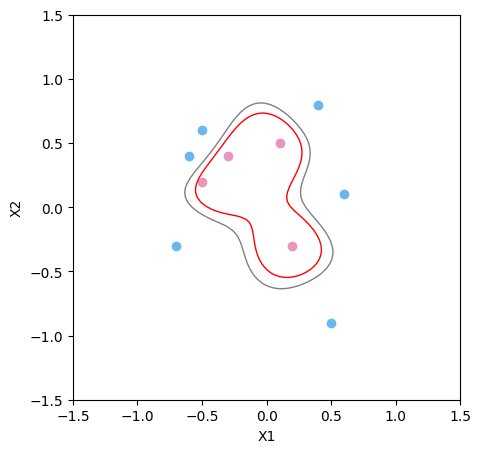

In [6]:
clf = svm.SVC(kernel='rbf', gamma=8, C=C) 
clf.fit(X, y)

plt.figure(figsize=(5, 5))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.array([decision_function(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='grey', linewidths=1)

Z_sklearn = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)
plt.contour(xx, yy, Z_sklearn, levels=[0], colors='red', linewidths=1)

plt.scatter(X_pos[:, 0], X_pos[:, 1], c='#e797bd')
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='#6ab6ef')

plt.xlabel('X1')
plt.ylabel('X2')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.show()

In the above figure, the red curve represents the decision boundary obtained from the SVM solver, while the gray curve shows the decision boundary from the quadratic programming solver.

Since the SVM solver and quadratic programming solver employ different algorithms, their decision boundaries do not perfectly coincide. If given the opportunity, we will further explain the SMO algorithm specifically designed for solving SVM optimization problems.

## Multiclass Classification with SVMs

In the previous presentation, we mentioned that support vector machines are more suitable for binary classification problems, but they can also handle N-class classification problems. During the Q&A session, I recall a question about handling nonlinear kernels in multiclass operations, which led me to research this topic further.

The previously introduced N-class classification method is:  
Select one class of training samples and perform binary classification with the remaining $N-1$ classes using an SVM. By repeating this operation N times, we obtain decision boundaries for N-class classification. This method is also called OvR (One-vs-Rest). For test samples, they are input into all $f_i$ functions, and confidence scores (commonly calculated using function values or probabilities) are computed to determine the final classification result.

Another common method is OvO (One-vs-One):  
For N classes, generate all possible class pairs  $(C_i,C_j),\quad\forall i,j\in 1,2,...,N$ , totaling $\frac{N(N-1)}{2}$ pairs. For each pair $(C_i, C_j)$, train a binary classifier $f_{ij}$ using only samples from $C_i$ and $C_j$. For test samples, input them into all $f_{ij}$ functions, conduct voting among the N classes based on classification results, and assign the class with the highest votes.

OvR and OvO are two common N-class classification methods for SVMs. Some researchers have also combined SVMs with directed acyclic graphs or other methods to continuously expand the field of multiclass classification with SVMs, including operations to adjust parameters of individual binary classifiers based on sample data, but these are topics for later discussion.

In the most basic mainstream SVM frameworks, when using OvR and OvO for multiclass classification, all binary sub-classifiers share the same hyperparameters, such as the upper bound $C$ and the RBF kernel parameter $\gamma$. This can be observed in the `multiclass.py` code from the `sklearn` library:

```python
# C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py 
# ↑ you need to change your own path ↑

def _fit_binary(estimator, X, y, classes=None):
    """Fit a single binary estimator."""
    unique_y = np.unique(y)
    if len(unique_y) == 1:
        if classes is not None:
            if y[0] == -1:
                c = 0
            else:
                c = y[0]
            warnings.warn(
                "Label %s is present in all training examples." % str(classes[c])
            )
        estimator = _ConstantPredictor().fit(X, unique_y)
    else:
        estimator = clone(estimator)
        estimator.fit(X, y)
    return estimator

class OneVsRestClassifier(
    MultiOutputMixin, ClassifierMixin, MetaEstimatorMixin, BaseEstimator
):
    _parameter_constraints = {
        "estimator": [HasMethods(["fit"])],
        "n_jobs": [Integral, None],
        "verbose": ["verbose"],
    }

    def __init__(self, estimator, *, n_jobs=None, verbose=0):
        self.estimator = estimator
        self.n_jobs = n_jobs
        self.verbose = verbose

    def fit(self, X, y):
        self._validate_params()

        self.label_binarizer_ = LabelBinarizer(sparse_output=True)
        Y = self.label_binarizer_.fit_transform(y)
        Y = Y.tocsc()
        self.classes_ = self.label_binarizer_.classes_
        columns = (col.toarray().ravel() for col in Y.T)

        self.estimators_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
            delayed(_fit_binary)(
                self.estimator,
                X,
                column,
                classes=[
                    "not %s" % self.label_binarizer_.classes_[i],
                    self.label_binarizer_.classes_[i],
                ],
            )
            for i, column in enumerate(columns)
        )

        if hasattr(self.estimators_[0], "n_features_in_"):
            self.n_features_in_ = self.estimators_[0].n_features_in_
        if hasattr(self.estimators_[0], "feature_names_in_"):
            self.feature_names_in_ = self.estimators_[0].feature_names_in_

        return self
```

The `_fit_binary` function:  
- Trains a single binary classifier  
- Uses `_ConstantPredictor` if training data contains only one class  
- Clones and trains the input estimator for multi-class cases  

`OneVsRestClassifier` class:  
1. Inherits from multiple mixin classes supporting multi-output, classification, and meta-estimator functionality  
2. `__init__` method initializes the estimator, n_jobs, and verbosity  
3. `fit` method:  
   - Transforms multiclass problem into multiple binary classifications  
   - Uses `LabelBinarizer` for label binarization  
   - Trains binary classifiers in parallel (one per class vs rest)  
   - Updates n_features_in_ and feature_names_in_ attributes  

Since `estimator = clone(estimator)` copies all parameters from the base learner, all binary sub-classifiers share identical parameters - including the penalty parameter $C$ and the RBF kernel parameter $\gamma$.